# WeRateDogs Twitter Data Analysis: Wrangling and Analyze Data

In [1]:
# Importing packages needed for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import os
import re
import tweepy

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Creating a directory
file_name = 'twitter-archive-enhanced'
if not os.path.exists(file_name):
    os.makedirs(file_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
response = requests.get(url)
print(response)

<Response [200]>


In [3]:
# Opening the file

with open(os.path.join(file_name, url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)

In [4]:
# Reading WeRateDogs Twitter archive data to a dataframe

twt_arc = pd.read_csv(url, sep=',')

In [5]:
twt_arc.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
# Creating a directory for image predictions file

folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Using get requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [7]:
# Opening the file

with open(os.path.join(folder_name, url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)

In [8]:
# Reading WeRateDogs Image Predictions data to a dataframe

img_prd = pd.read_csv(url, sep='\t')

In [9]:
img_prd.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

As at the time of this Project, my application for Twitter Developer Account is still pending.
I used the tweet-json.txt file provided 

In [10]:
# Creating an empty list to append the data

df_list = []

# Opening and Reading the tweet-json text file

with open('tweet-json.txt', 'r') as json_file:
    for line in json_file.readlines():
        tweet_line = json.loads(line)
        
        
        # Getting the required columns
        
        tweet_id = tweet_line['id']
        retweet_count = tweet_line['retweet_count']
        favorite_count = tweet_line['favorite_count']
        
        
         # Appending each to the list
            
        df_list.append({
                "tweet_id" : tweet_id,
                "retweet_count" : retweet_count,
                "favorite_count" : favorite_count})

In [11]:
# converting to pandas dataframe

twt_json = pd.DataFrame(df_list, columns=["tweet_id",'retweet_count', 'favorite_count'])

In [12]:
twt_json.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


# Assessing Data


## Assessing the First Data (Twitter Archive Data)

### Twitter Archive Data- Column Description

#### Here's a brief decription of column headers

* tweet_id - unique id for each tweet by the twitter account @DogRates

* in_reply_to_status_id - If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

* in_reply_to_user_id - If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet.

* timestamp - The time the tweet was tweeted

* source - The source of the tweet

* text - This is the content of the tweet

* retweeted_status_id - This attribute contains a representation of the original Tweet that was retweeted.

* retweeted_status_user_id - The id of the retweeted status user

* retweeted_status_timestamp - This attribute contains a representation of the time the original Tweet was retweeted.
* expanded_urls - This is the url of the tweet( can be used to access the tweet directly)

* rating_numerator - This is the numerator of the ratings for the dog

* rating_denominator - his is the denominator of the ratings for the dog(should always be 10)

* name - This is the name of the dog

* doggo - This is one of the dog stages

* floofer - This is one of the dog stages

* pupper - This is one of the dog stages

* puppo - This is one of the dog stages


In [13]:
twt_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [14]:
twt_arc.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
twt_arc.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [16]:
twt_arc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
598,798686750113755136,NaN,NaN,2016-11-16 00:38:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Say hello to Jack (pronounced ""...",6.833919e+17,4.196984e+09,2016-01-02 20:58:09 +0000,https://twitter.com/dog_rates/status/683391852...,11,10,Jack,None,None,None,None
432,820749716845686786,NaN,NaN,2017-01-15 21:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sunny. He can take down a polar bear in o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None
1106,734787690684657664,NaN,NaN,2016-05-23 16:46:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is more successful than I will ever b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734787690...,13,10,None,None,None,None,None
1888,674781762103414784,NaN,NaN,2015-12-10 02:44:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Bedazzled pup here. Fashionable af. Super yell...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674781762...,8,10,None,None,None,None,None
1554,688898160958271489,NaN,NaN,2016-01-18 01:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you have a ton of work to do but then rem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688898160...,10,10,None,None,None,None,None


In [17]:
twt_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
twt_arc.shape

(2356, 17)

In [19]:
twt_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
# Checking for duplicates

twt_arc.duplicated().sum()

0

In [21]:
# Checking for null values

twt_arc.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
# Getting counts of unique values in rating_denominator column and sorting in descending order

twt_arc.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
twt_arc.rating_denominator[twt_arc.rating_denominator != 10]

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [24]:
len(twt_arc.rating_denominator[twt_arc.rating_denominator != 10])

23

As observed above, there are 23 rows where the rating_denominator is not 10, this is an inconsistent issue and will be addressed later

In [25]:
# Getting counts of unique values in rating_denominator column and sorting in ascending order

twt_arc.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [26]:
# Getting counts of unique values of name column

twt_arc.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [27]:
# Using Regex to get the list of all names that are lowercase

names_lower = twt_arc.name.str.contains('^[a-z]', regex = True)
twt_arc[names_lower].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

As shown above, the names that are not real are all lower case

In [28]:
len(twt_arc[names_lower].name)

109

In [29]:
twt_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [30]:
# Checking the names of each columns

twt_arc.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

# Assessing the Second Data (Image Predictions Data)

#### Here's a brief decription of column headers

* tweet_id - unique id for each tweet by the twitter account

* jpg_url - url for the dog image

* img_num - image number ranging from 1 to 4

* p1 - the algorithm's #1 prediction for the image in the tweet

* p1_conf - how confident the algorithm is in its #1 prediction

* p1_dog - whether or not the #1 prediction is a breed of dog

* p2 - the algorithm's #2 prediction for the image in the tweet

* p2_conf - how confident the algorithm is in its #2 prediction

* p2_dog - whether or not the #2 prediction is a breed of dog

* p3 - the algorithm's #3 prediction for the image in the tweet

* p3_conf - how confident the algorithm is in its #3 prediction

* p3_dog- whether or not the #3 prediction is a breed of dog



In [31]:
img_prd

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [32]:
# Checking the first 5 rows

img_prd.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
# Checking the last 5 rows

img_prd.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [34]:
img_prd.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1385,766008592277377025,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh_springer_spaniel,0.728153,True,basset,0.103842,True,Brittany_spaniel,0.062414,True
558,677698403548192770,https://pbs.twimg.com/media/CWerGmOXAAAm6NY.jpg,1,Shih-Tzu,0.916645,True,Lhasa,0.057883,True,Pekinese,0.020126,True
1394,767500508068192258,https://pbs.twimg.com/media/Cqa1ofnXEAAG0yn.jpg,1,chow,0.483228,True,golden_retriever,0.165063,True,Norfolk_terrier,0.060173,True
1498,783695101801398276,https://pbs.twimg.com/media/CuA-iRHXYAAWP8e.jpg,3,chow,0.314265,True,golden_retriever,0.300435,True,Australian_terrier,0.049487,True
729,686606069955735556,https://pbs.twimg.com/media/CYdQktMWsAEI29_.jpg,1,Labrador_retriever,0.320012,True,Ibizan_hound,0.208172,True,Saluki,0.078975,True
512,676215927814406144,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,1,hamster,0.999484,False,guinea_pig,0.000158,False,broccoli,0.000061,False
751,688064179421470721,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,1,Eskimo_dog,0.240602,True,Norwegian_elkhound,0.180369,True,Siberian_husky,0.090739,True
1101,720785406564900865,https://pbs.twimg.com/media/CgC-gMCWcAAawUE.jpg,1,Chihuahua,0.896422,True,dingo,0.027929,False,kelpie,0.017916,True
300,671488513339211776,https://pbs.twimg.com/media/CVGbPgrWIAAQ1fB.jpg,1,hermit_crab,0.528761,False,snail,0.185644,False,shower_curtain,0.066361,False
434,674372068062928900,https://pbs.twimg.com/media/CVvZ0KTWwAAdXKV.jpg,1,seashore,0.346126,False,American_alligator,0.106404,False,sandbar,0.049349,False


In [35]:
img_prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
img_prd.shape

(2075, 12)

In [37]:
img_prd.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
# Checking for duplicates

img_prd.duplicated().sum()

0

In [39]:
# Checking for null or missing data

img_prd.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [40]:
# Getting counts of unique values of p1_dog column

img_prd.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [41]:
# Getting counts of unique values of p1 column

img_prd.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [42]:
img_prd.p1_conf.value_counts()

0.721188    2
0.676439    2
0.505370    2
0.777468    2
0.254856    2
           ..
0.141432    1
0.722218    1
0.278600    1
0.375610    1
0.097049    1
Name: p1_conf, Length: 2006, dtype: int64

In [43]:
img_prd.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

# Assessing Tweet Data

### A brief decription of column headers

* tweet_id - unique id for each tweet by the twitter account @DogRates

* retweet_count - the number of times the tweet has been retweeted

* favorite_count - the number of times the tweet has been favorited(now known as liked)


In [44]:
twt_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [45]:
twt_json.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [46]:
twt_json.tail(5)

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [47]:
twt_json.sample(10)

,tweet_id,retweet_count,favorite_count
815,770772759874076672,1626,5749
691,787111942498508800,7798,0
386,826598799820865537,292,5637
863,762316489655476224,1298,5350
1958,673363615379013632,338,1088
164,860177593139703809,33421,0
4,891327558926688256,9774,41048
1886,674781762103414784,1335,2169
2032,671743150407421952,248,779
1910,674394782723014656,635,1607


In [48]:
twt_json.shape

(2354, 3)

In [49]:
twt_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [50]:
twt_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [51]:
# Checking the duplicates

twt_json.duplicated().sum()

0

In [52]:
# Checking for null or missing data

twt_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [53]:
twt_json.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Quality issues

1. Retweeted status id is not null (it needs to be dropped) only Tweets is needed and not Retweets acording to the information given for the project.

2. Missing values in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls columns.

3. Source column is an href (combination of url and text) instead of text only.

4. Timestamp and retweeted_status_timestamp as string datatype instead of datetime/ Incorrect datatype of timestamp and retweetedstatus_timestamp column.

5. Tweet Id as integer instead of string (incorrect datatype).

6. Rating Denominator is not 10 in some row.

7. Irrelevant column img_num needs to be dropped.

8. Redundant data in text column.

### Tidiness issues

1. Twitter Archive Data (twt_arc), Image Predictions Data(img_prd), and Tweet Json Data (twt_json) 
   should be combined as one.

2. dog_stage in Twitter Archive table(twt_arc) is in 4 columns instead of 1.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [54]:
# Make copies of original pieces of data

twt_arc_clean = twt_arc.copy()
img_prd_clean = img_prd.copy()
twt_json_clean = twt_json.copy()

### Issue #1:

#### Define:

Drop Rows where Retweet_id is not null (Because only Tweets is needed and not Retweets)

#### Code

In [55]:
# Filtering to get only rows where retweets is null

twt_arc_clean = twt_arc_clean[twt_arc_clean.retweeted_status_id.isnull()]

#### Test

In [56]:
twt_arc_clean.retweeted_status_id.notnull().sum()

0

In [57]:
twt_arc_clean.retweeted_status_user_id.notnull().sum()

0

In [58]:
twt_arc_clean.retweeted_status_timestamp .notnull().sum()

0

#### Observation:

As seen above, there are no rows where retweeted_status_id is not null, the code also handled retweeted_status_user_id and retweeted_status_timestamp. We are sure now that we only have Tweets and not Retweets in our dataframe.


### Issue #2:

#### Define

Drop rows where rating_denominator is not 10 (the rows to be dropped are 23 as shown in assessing, and this won't affect the analysis)

#### Code

In [59]:
# Getting the count of rows where denominator is not equal to 10

len(twt_arc.rating_denominator[twt_arc.rating_denominator != 10])

23

In [60]:
# Filter to get only rows where rating_denominator is equal to 10

twt_arc_clean = twt_arc[twt_arc['rating_denominator'] == 10]

#### Test

In [61]:
len(twt_arc_clean.rating_denominator[twt_arc.rating_denominator != 10])

0

In [62]:
twt_arc_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

#### Observation: 
There are no rows where the denominator is not equal to 10

### Other Issues
##### This is where I'm going to drop the columns that are not useful, merge the dataset together for the visualization

In [63]:
# Extracting source text from source column in twitter achive data

# Getting the unique values in source column

twt_arc_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2198
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [64]:
# Replacing the source with only the text component

twt_arc_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
twt_arc_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene', inplace=True)
twt_arc_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
twt_arc_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6728\2076057190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twt_arc_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6728\2076057190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twt_arc_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6728\2076057190.py:5: SettingWithCopyWarning: 
A value is trying to be set on

In [65]:
twt_arc_clean.source.value_counts()

Twitter for iPhone     2198
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [66]:
#Removing rows where dog name is in lower case (not real dog names)

#Using Regex to get the list of all names that are lowercase 

names_lower = twt_arc_clean.name.str.contains('^[a-z]', regex = True)
twt_arc_clean[names_lower].name.value_counts().sort_index()

a               54
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
unacceptable     1
very             5
Name: name, dtype: int64

In [67]:
# Checking count of number of rows where name is in lowercase

len(twt_arc_clean[names_lower].name)

106

In [68]:
# Filtering to get only rows where name contains with Upper case letter

twt_arc_clean = twt_arc_clean[twt_arc_clean['name'].str.contains('^[A-Z]+')]

In [69]:
twt_arc_clean[names_lower].name.value_counts().sort_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_6728\1357977622.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twt_arc_clean[names_lower].name.value_counts().sort_index()


Series([], Name: name, dtype: int64)

In [70]:
len(twt_arc_clean[names_lower].name)

C:\Users\USER\AppData\Local\Temp\ipykernel_6728\2082286318.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(twt_arc_clean[names_lower].name)


0

In [71]:
#Drop column image number img_num in image predictions dataframe(img_prd_clean)

img_prd_clean.drop('img_num', axis=1, inplace=True)

In [72]:
img_prd_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [73]:
img_prd_clean.head(1)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [74]:
"""

Drop columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, 
retweeted_status_timestamp, expanded_urls(6 Columns) 
(They contain missing values)

"""

twt_arc_clean.drop(columns= ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6728\953644861.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twt_arc_clean.drop(columns= ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',


In [75]:
twt_arc_clean.shape

(2227, 11)

In [76]:
twt_arc_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [77]:
# Joining doggo, floofer, pupper, and puppo columns into a single column called "dog_stage'using lambda, Then drop the columns

# Replacing none in the respective columns with no space

twt_arc_clean['doggo'].replace("None",  "", inplace=True)
twt_arc_clean['floofer'].replace("None", "", inplace=True)
twt_arc_clean['pupper'].replace("None", "", inplace=True)
twt_arc_clean['puppo'].replace("None", "", inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6728\3481507866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twt_arc_clean['doggo'].replace("None",  "", inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6728\3481507866.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twt_arc_clean['floofer'].replace("None", "", inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6728\3481507866.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [78]:
# Using lambda to join the columns

twt_arc_clean['dog_stage'] = twt_arc_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis = 1)

C:\Users\USER\AppData\Local\Temp\ipykernel_6728\2928318545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twt_arc_clean['dog_stage'] = twt_arc_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis = 1)


In [79]:
twt_arc_clean.dog_stage.value_counts()

                1863
pupper           233
doggo             81
puppo             29
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [80]:
# Separating rows that meet certain conditions with a comma

twt_arc_clean['dog_stage'].mask(twt_arc_clean['dog_stage'] == 'doggopupper', 'doggo,pupper', inplace=True)
twt_arc_clean['dog_stage'].mask(twt_arc_clean['dog_stage'] == 'doggofloofer', 'doggo,floofer ', inplace=True) 
twt_arc_clean['dog_stage'].mask(twt_arc_clean['dog_stage'] == 'doggopuppo', 'doggo,puppo', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6728\1466474598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twt_arc_clean['dog_stage'].mask(twt_arc_clean['dog_stage'] == 'doggopupper', 'doggo,pupper', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6728\1466474598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twt_arc_clean['dog_stage'].mask(twt_arc_clean['dog_stage'] == 'doggofloofer', 'doggo,floofer ', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6728\1466474598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [81]:
# Replacing empty spaces with None in the dog_stage column

twt_arc_clean['dog_stage'] = twt_arc_clean['dog_stage'].replace('', 'None')

C:\Users\USER\AppData\Local\Temp\ipykernel_6728\1155271363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twt_arc_clean['dog_stage'] = twt_arc_clean['dog_stage'].replace('', 'None')


In [82]:
# Dropping some columns

twt_arc_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6728\2178435947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twt_arc_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


In [83]:
twt_arc_clean.dog_stage.value_counts()

None              1863
pupper             233
doggo               81
puppo               29
doggo,pupper        10
floofer              9
doggo,puppo          1
doggo,floofer        1
Name: dog_stage, dtype: int64

In [84]:
# Checking the columns

twt_arc_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

# Merging Twitter Archive Data (twt_arc_clean), Image Predictions Data (img_prd_clean), and Tweet Json Data (twt_json_clean)

In [85]:
print(twt_arc_clean.shape)
print(img_prd_clean.shape)
print(twt_json_clean.shape)

(2227, 8)
(2075, 11)
(2354, 3)


In [86]:
# Merge inner to get only tweets that appear in both dataframe

d_merged =twt_arc_clean.merge(twt_json_clean, how='inner', on='tweet_id')

In [87]:
total_merged =d_merged.merge(img_prd_clean, how='inner', on='tweet_id')

In [88]:
total_merged

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953,666082916733198337,2015-11-16 02:38:37 +0000,Twitter for iPhone,Here we have a well-established sunblockerspan...,6,10,None,None,47,121,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
1954,666073100786774016,2015-11-16 01:59:36 +0000,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). ...,10,10,None,None,174,335,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
1955,666071193221509120,2015-11-16 01:52:02 +0000,Twitter for iPhone,Here we have a northern speckled Rhododendron....,9,10,None,None,67,154,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
1956,666049248165822465,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [89]:
# Drop text column

total_merged.drop(['text'], axis = 1, inplace=True)

In [90]:
total_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 1957
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1958 non-null   int64  
 1   timestamp           1958 non-null   object 
 2   source              1958 non-null   object 
 3   rating_numerator    1958 non-null   int64  
 4   rating_denominator  1958 non-null   int64  
 5   name                1958 non-null   object 
 6   dog_stage           1958 non-null   object 
 7   retweet_count       1958 non-null   int64  
 8   favorite_count      1958 non-null   int64  
 9   jpg_url             1958 non-null   object 
 10  p1                  1958 non-null   object 
 11  p1_conf             1958 non-null   float64
 12  p1_dog              1958 non-null   bool   
 13  p2                  1958 non-null   object 
 14  p2_conf             1958 non-null   float64
 15  p2_dog              1958 non-null   bool   
 16  p3    

In [91]:
"""

Convert tweet_id to string, timestamp to datetime, dog_stage to categorical, 
p1_dog, p2_dog and p3_dog to categorical datatype.

"""

total_merged.tweet_id = total_merged.tweet_id.astype(str)
total_merged.timestamp = pd.to_datetime(total_merged.timestamp)
total_merged.dog_stage = total_merged.dog_stage.astype('category')
total_merged.p1_dog = total_merged.p1_dog.astype('category')
total_merged.p1_dog = total_merged.p1_dog.astype('category')
total_merged.p3_dog = total_merged.p3_dog.astype('category')

In [92]:
total_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 1957
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1958 non-null   object             
 1   timestamp           1958 non-null   datetime64[ns, UTC]
 2   source              1958 non-null   object             
 3   rating_numerator    1958 non-null   int64              
 4   rating_denominator  1958 non-null   int64              
 5   name                1958 non-null   object             
 6   dog_stage           1958 non-null   category           
 7   retweet_count       1958 non-null   int64              
 8   favorite_count      1958 non-null   int64              
 9   jpg_url             1958 non-null   object             
 10  p1                  1958 non-null   object             
 11  p1_conf             1958 non-null   float64            
 12  p1_dog              1958 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [93]:
# Storing in a csv file named twitter_archive_master.csv

total_merged.to_csv("twitter_archive_master.csv", index=False)

In [94]:
# Reading the data to a new dataframe

twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [95]:
twitter_archive_master.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Insights:

1. top 3 dog_stages to receive the most likes (favorite_count) are doggo,puppo puppo and doggo

2. There's a strong correlation between retweet and likes, tweets with plenty retweet will 
   surely garner more likes (our r = 0.786 which is close to 1 according to pearson scale)

3. It is likely that tweet from Iphone attracts more retweets and likes but we should not 
   neglect other factors that comes into play.

## Visualization

### Which Dog Stage has the most likes?

In [96]:
twitter_archive_master.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False)

dog_stage
doggo,puppo       47844.000000
puppo             20643.739130
doggo             18408.938462
doggo,floofer     17169.000000
floofer           13206.000000
doggo,pupper      11384.000000
None               8314.107208
pupper             6890.363184
Name: favorite_count, dtype: float64

The statistics above tells us that the top 3 dog_stages to receive the most likes(favorite_count) are doggo,puppo 
puppo and doggo.
Let's show this with a plot (bar to be precise)

Text(0.5, 0, 'Dog_Stage')

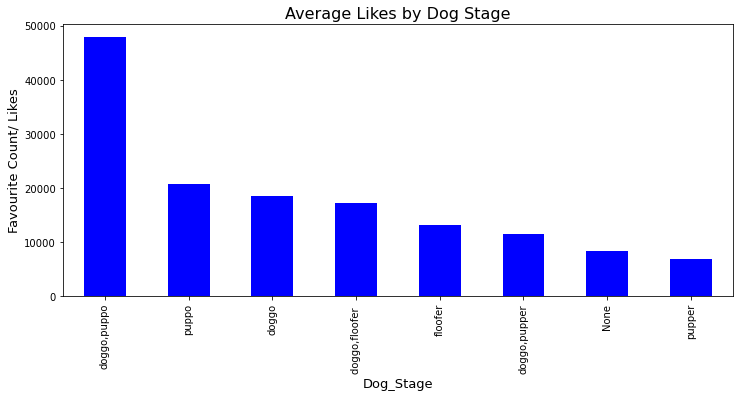

In [99]:
twitter_archive_master.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False).plot(kind='bar', color='blue', figsize=(12,5))
plt.title('Average Likes by Dog Stage', fontsize=16)
plt.ylabel('Favourite Count/ Likes', fontsize=13)
plt.xlabel('Dog_Stage', fontsize=13)

#### Observation: 
We can see that the chart shows how compared to other stages doggo,puppo received an outrageous
number of likes clearer than the statistics showed alone.

### Is there any correlation between Retweet_count (retweets) and Favourite_count (likes)?

Text(0, 0.5, 'LIkes')

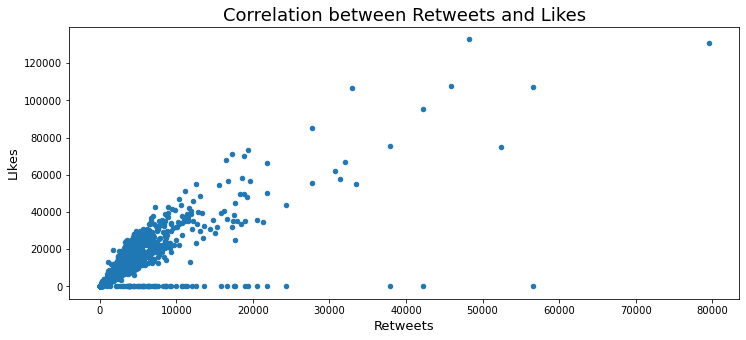

In [100]:
twitter_archive_master.plot(x = "retweet_count", y = "favorite_count", kind ='scatter', figsize=(12,5))
plt.title('Correlation between Retweets and Likes', fontsize=18)
plt.xlabel('Retweets', fontsize=13)
plt.ylabel('LIkes', fontsize=13)

In [101]:
# Using Pearson correlation coefficient to check the value of r, the closer it is to 1, the higher the correlation.

from scipy.stats import pearsonr
pearsonr(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count)

(0.7862314759977549, 0.0)

Since r = 0.786 which is close to 1, there's a strong correlation between retweets and Likes. Tweets that garner more retweets are likely to garner more likes

### Are tweets tweeted from an Iphone likely to gather more likes?

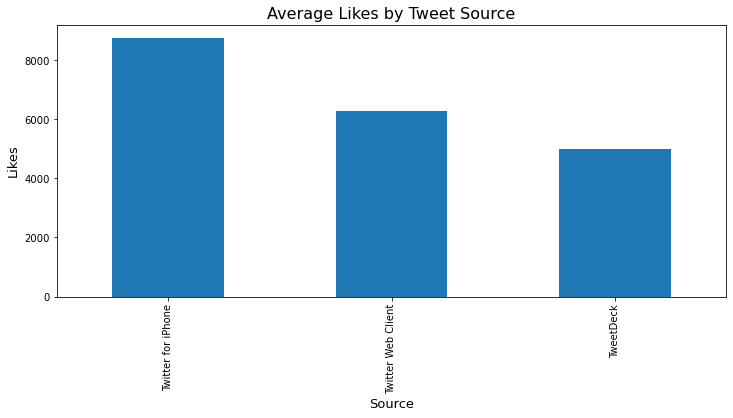

In [102]:
twitter_archive_master.groupby('source')['favorite_count'].mean().sort_values(ascending=False).plot(kind='bar',  figsize=(12,5))
plt.title('Average Likes by Tweet Source', fontsize=16)
plt.xlabel('Source', fontsize=13)
plt.ylabel('Likes', fontsize=13)
plt.figsize=(12,5)

The bar chart shows the average likes tweets by tweet source. It is likely that tweet from an Iphone gathers more likes, but it is worthy to note that there are other factors that could be at play such as contents of the tweet.